In [41]:
#Get the essential libraries
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#Import the dataset
or_data = pd.read_csv("car_data.csv")
or_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
# Get the details of the dataset
or_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
#Look at the categorical variable values

# or_data.columns
# print(or_data['Car_Name'].value_counts())
print(or_data['Fuel_Type'].value_counts())
print(or_data['Seller_Type'].value_counts())
print(or_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [45]:
#Look at the statistics of dataset
or_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [46]:
#Figure out whether we have any missing values in dataset
or_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [47]:
#Find the correlation of different features of the dataset with its label
or_data.corr()['Selling_Price']

C:\Users\lomas\AppData\Local\Temp\ipykernel_26488\126647568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  or_data.corr()['Selling_Price']


Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

C:\Users\lomas\AppData\Local\Temp\ipykernel_26488\2857927934.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = or_data.corr()


<Axes: >

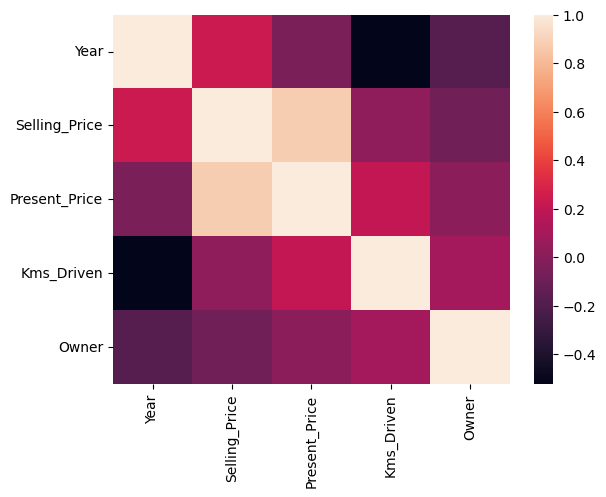

In [48]:
#Look at the correlation of all the variables
cor = or_data.corr()
sns.heatmap(cor)

In [49]:
#Data Preprocessing and Preparation
or_data['Age'] = 2020 - or_data['Year']
or_data.drop('Year',axis = 1 , inplace = True)
or_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [50]:
or_data.drop('Car_Name',axis = 1 , inplace = True)
or_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [51]:
or_data = pd.get_dummies(data = or_data,drop_first=True)
or_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [52]:
X = or_data.drop('Selling_Price',axis = 1)
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [53]:
Y = or_data[['Selling_Price']]
Y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [54]:
#Divide the dataset into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("Y train: ",Y_train.shape)
print("Y test: ",Y_test.shape)

X train:  (240, 8)
X test:  (61, 8)
Y train:  (240, 1)
Y test:  (61, 1)


In [55]:
#Fit the Linear regressor on the training data

lm = linear_model.LinearRegression()

lm.fit(X_train,Y_train)

LinearRegression()